# 0. Library Import

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import folium 
import requests
import json
import os
from tqdm import tqdm

import folium
from IPython.core.display import display, HTML

def folium_deepnote_show(m):
    data = m.get_root().render()
    data_fixed_height = data.replace('width: 100%;height: 100%', 'width: 100%').replace('height: 100.0%;', 'height: 1000px;', 1)
    display(HTML(data_fixed_height))

# 한글 폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rcParams['font.family'] ='NanumSquareRound'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

# 1.데이터

## 1.1 사용 데이터

1) [서울 시민생활 데이터-행정동단위 10개 관심집단수](https://data.seoul.go.kr/dataVisual/seoul/seoulLiving.do)

2) [서울시 1인가구(연령별) 통계](https://data.seoul.go.kr/dataList/10995/S/2/datasetView.do)

## 1.2 데이터 불러오기

#### 구글드라이브 마운트

In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 사용 데이터셋 불러오기

In [3]:
# 서울 시민 생활 데이터 - 행정동 단위 10개 관심집단 수 (2021.01 ~ 2022.01)
df = pd.read_csv("drive/MyDrive/12Team/data/total_interesting.csv")

# 지역 별 연령 별 1인가구 수 (2016~2021) 
df_year = pd.read_excel("drive/MyDrive/12Team/data/1인가구_연령별.xlsx")

# 서울시 행정구역 시군구 정보 (위도, 경도)
df_info = pd.read_csv("drive/MyDrive/12Team/data/서울시_행정구역_시군구_정보.csv")

df.head()

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,행정동코드,자치구,행정동명,성별,연령대,총인구,1인가구수,커뮤니케이션이 적은 집단,평일 외출이 적은 집단,휴일 외출이 적은 집단,출근소요시간 및 근무시간이 많은 집단,외출이 매우 적은 집단(전체),외출이 매우 많은 집단,동영상서비스 이용이 많은 집단,생활서비스 이용이 많은 집단,재정상태에 대한 관심집단,외출-커뮤니케이션이 모두 적은 집단(전체)
0,1101053,종로구,사직동,1,20,221.00,51.97,8.335199,5.796584,7.415139,5.552525,4.166128,4.89,7.638924,1.961916,3.961066,2.067203
1,1101053,종로구,사직동,1,25,321.00,109.52,11.470799,11.454176,7.532451,11.114420,4.869294,12.95,10.347566,19.109366,16.766866,2.405569
2,1101053,종로구,사직동,1,30,351.11,107.71,15.288244,15.401204,9.599103,11.075590,9.442518,20.05,14.181075,10.767105,13.375326,6.666862
3,1101053,종로구,사직동,1,35,353.00,106.53,16.389481,10.787259,7.525317,10.245072,11.536156,15.33,16.540153,9.957706,7.537253,13.037654
4,1101053,종로구,사직동,1,40,419.00,80.24,13.778743,6.035512,11.261931,5.563842,7.523350,10.97,7.483620,5.407695,8.732050,11.160781


---------------

# 2.데이터 확인

### 2.1 서울 시민생활 데이터-행정동단위 10개 관심집단수 데이터

In [4]:
display(df.head())

,행정동코드,자치구,행정동명,성별,연령대,총인구,1인가구수,커뮤니케이션이 적은 집단,평일 외출이 적은 집단,휴일 외출이 적은 집단,출근소요시간 및 근무시간이 많은 집단,외출이 매우 적은 집단(전체),외출이 매우 많은 집단,동영상서비스 이용이 많은 집단,생활서비스 이용이 많은 집단,재정상태에 대한 관심집단,외출-커뮤니케이션이 모두 적은 집단(전체)
0,1101053,종로구,사직동,1,20,221.00,51.97,8.335199,5.796584,7.415139,5.552525,4.166128,4.89,7.638924,1.961916,3.961066,2.067203
1,1101053,종로구,사직동,1,25,321.00,109.52,11.470799,11.454176,7.532451,11.114420,4.869294,12.95,10.347566,19.109366,16.766866,2.405569
2,1101053,종로구,사직동,1,30,351.11,107.71,15.288244,15.401204,9.599103,11.075590,9.442518,20.05,14.181075,10.767105,13.375326,6.666862
3,1101053,종로구,사직동,1,35,353.00,106.53,16.389481,10.787259,7.525317,10.245072,11.536156,15.33,16.540153,9.957706,7.537253,13.037654
4,1101053,종로구,사직동,1,40,419.00,80.24,13.778743,6.035512,11.261931,5.563842,7.523350,10.97,7.483620,5.407695,8.732050,11.160781


In [5]:
print("===== 데이터 크기 =====")
print(df.shape)

print()
print("===== 데이터 정보 =====")
print(df.info())

print()
print("===== 결측값 확인 =====")
print(df.isnull().sum())

===== 데이터 크기 =====
(111936, 17)

===== 데이터 정보 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111936 entries, 0 to 111935
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   행정동코드                    111936 non-null  int64  
 1   자치구                      111936 non-null  object 
 2   행정동명                     111936 non-null  object 
 3   성별                       111936 non-null  int64  
 4   연령대                      111936 non-null  int64  
 5   총인구                      111936 non-null  float64
 6   1인가구수                    111936 non-null  float64
 7   커뮤니케이션이 적은 집단            111936 non-null  float64
 8   평일 외출이 적은 집단             111936 non-null  float64
 9   휴일 외출이 적은 집단             111936 non-null  float64
 10  출근소요시간 및 근무시간이 많은 집단     111936 non-null  float64
 11  외출이 매우 적은 집단(전체)         111936 non-null  float64
 12  외출이 매우 많은 집단             111936 non-null  float64
 13  동영상서비스 

---------

### 2.2 서울시 1인가구(연령별) 통계 데이터
데이터를 사용하기 위해 전처리가 필요합니다. (데이터 전처리 단계에서 진행)

In [6]:
df_year.head()

,자치구별(1),자치구별(2),2016,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,...,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12,2021.13,2021.14,2021.15
0,자치구별(1),자치구별(2),합계,합계,합계,합계,합계,합계,합계,합계,...,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계
1,자치구별(1),자치구별(2),소계,20세미만,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
2,자치구별(1),자치구별(2),계,계,계,계,계,계,계,계,...,계,계,계,계,계,계,계,계,계,계
3,합계,소계,1138860.0,14937.0,101069.0,169534.0,152434.0,107045.0,88976.0,83763.0,...,99293.0,89640.0,89413.0,86500.0,102413.0,88494.0,69402.0,57061.0,42020.0,28407.0
4,합계,종로구,22835.0,526.0,2973.0,3547.0,2486.0,1723.0,1497.0,1633.0,...,1690.0,1620.0,1783.0,1757.0,1864.0,1546.0,1160.0,1133.0,811.0,597.0


#3.EDA
`서울 시민생활 데이터-행정동단위 10개 관심집단수` 데이터로 어떤 분석과 시각화를 진행할 수 있을지 탐색합니다. **연령별**과 **지역별**로 나누어 탐색을 진행합니다.

## 3.1 연령대 별


### 3.1.1 연령대 별 관심 집단 수 전체 히트맵
연령대 별로 전체 관심 집단 수 평균을 구하고, 전체적으로 각 연령대의 특정을 파악합니다.

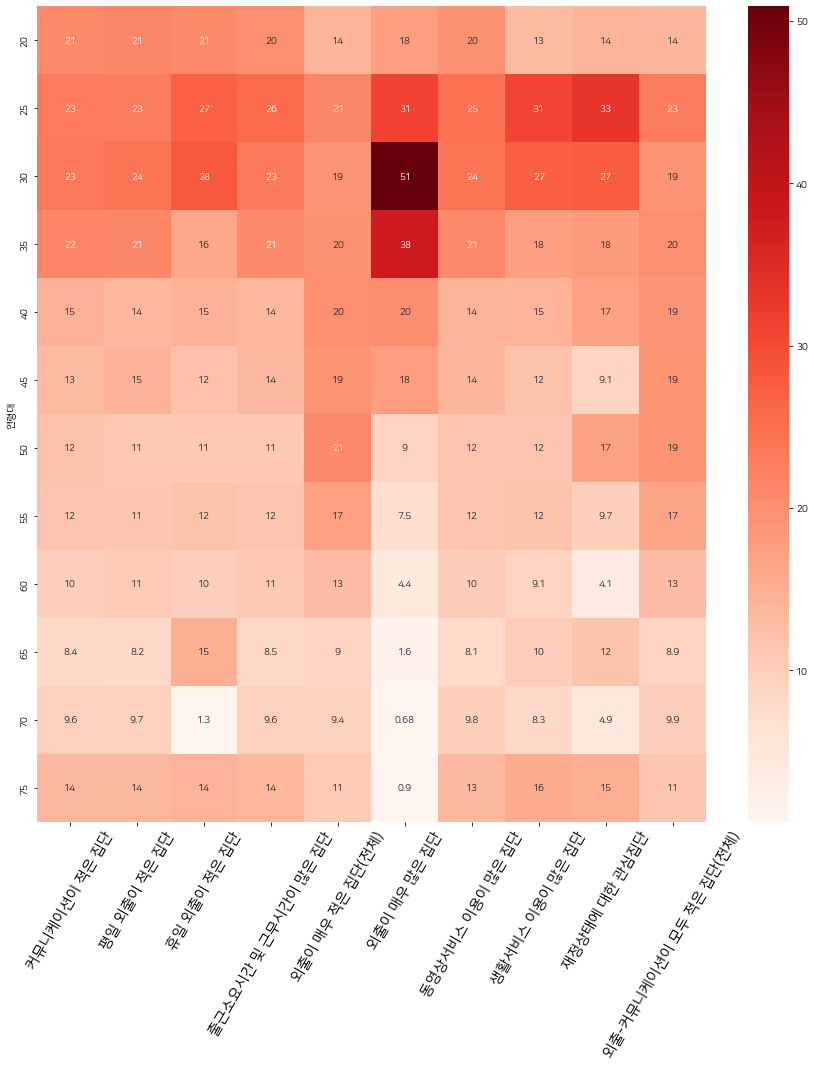

In [7]:
df2 = df.iloc[:, 4:].drop(columns=['총인구', '1인가구수']).groupby("연령대").mean()

plt.figure(figsize=(15, 15))
sns.heatmap(df2, cmap='Reds', annot=True)
_ = plt.xticks(fontsize=15, rotation=60)

- 대체적으로 20~30에 집중되어있고, 40대 이후의 연령대는 수치가 낮습니다. 

### 3.1.2 연령대 별 외출과 커뮤니케이션이 적은 집단
위의 히트맵에서 특히 20~30대에 몰려있는 커뮤니케이션, 외출, 서비스 관련 컬럼들만 뽑아서 시각화합니다.

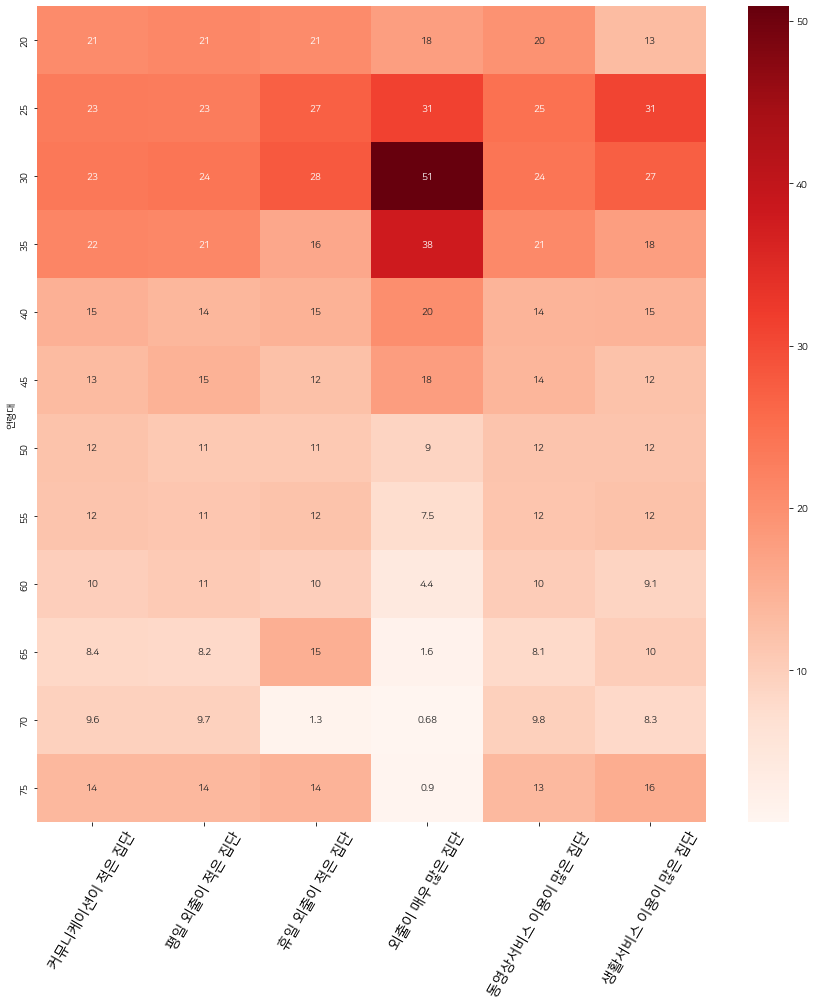

In [8]:
df3 = df.groupby("연령대")[["커뮤니케이션이 적은 집단", '평일 외출이 적은 집단', '휴일 외출이 적은 집단', "외출이 매우 많은 집단", "동영상서비스 이용이 많은 집단", "생활서비스 이용이 많은 집단"]].mean()

plt.figure(figsize=(15, 15))
sns.heatmap(df3, cmap='Reds', annot=True)
_ = plt.xticks(fontsize=15, rotation=60)

-연령대가 높아질 수록 대체적으로 커뮤니케이션 및 외출이 적고, 생활서비스 이용도 적은 것으로 나타났습니다. 

### 3.1.3 연령대 별 1인 가구 수  
연령대 별 총 인구 수 대비 1인 가구 수와 연령대 별 1인가구의 비율을 시각화하여 어느 연령대에 1인 가구가 많이 존재하는지 확인합니다. 

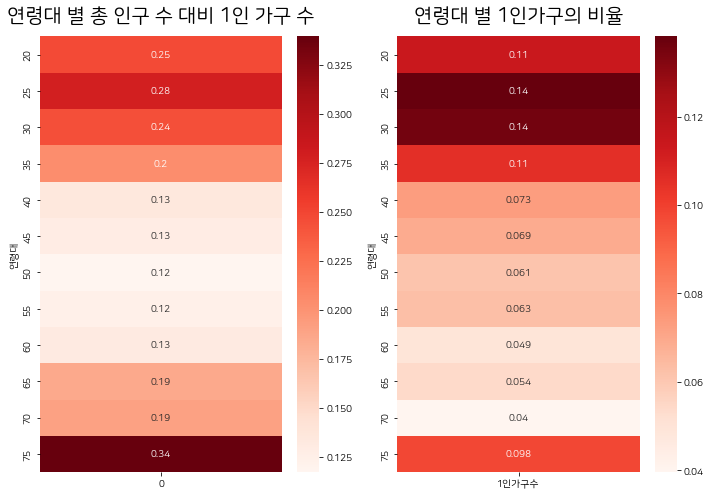

In [9]:
fig = plt.figure(figsize=(10, 7))
ax1, ax2 = fig.subplots(1, 2)

# 연령대 별 총 인구 수 대비 1인 가구 수
sr1 = df.groupby("연령대")['1인가구수'].mean() / df.groupby("연령대")['총인구'].mean()
sns.heatmap(sr1.to_frame(), cmap='Reds', annot=True, ax=ax1)
ax1.set_title("연령대 별 총 인구 수 대비 1인 가구 수", pad=15, fontsize=20)

# 연령대 별 1인가구의 비율
sr2 = df.groupby("연령대")['1인가구수'].sum() / df['1인가구수'].sum()
sns.heatmap(sr2.to_frame(), cmap='Reds', annot=True, ax=ax2)
ax2.set_title("연령대 별 1인가구의 비율", pad=15, fontsize=20)

fig.tight_layout()
plt.show()

- 연령대가 낮을 수록 1인 가구 수의 비율이 높고, 75세도 높은 것으로 나옵니다. 
- 65세 이후에는 데이터의 수가 적기 때문에 연령대를 크게 5가지로 나누어 병합할 필요성이 있습니다. (데이터 전처리 단계에서 진행)

### 3.1.4 이상치 💡
1인가구수, 외출이 매우 많은 집단, 커뮤니케이션이 적은 집단

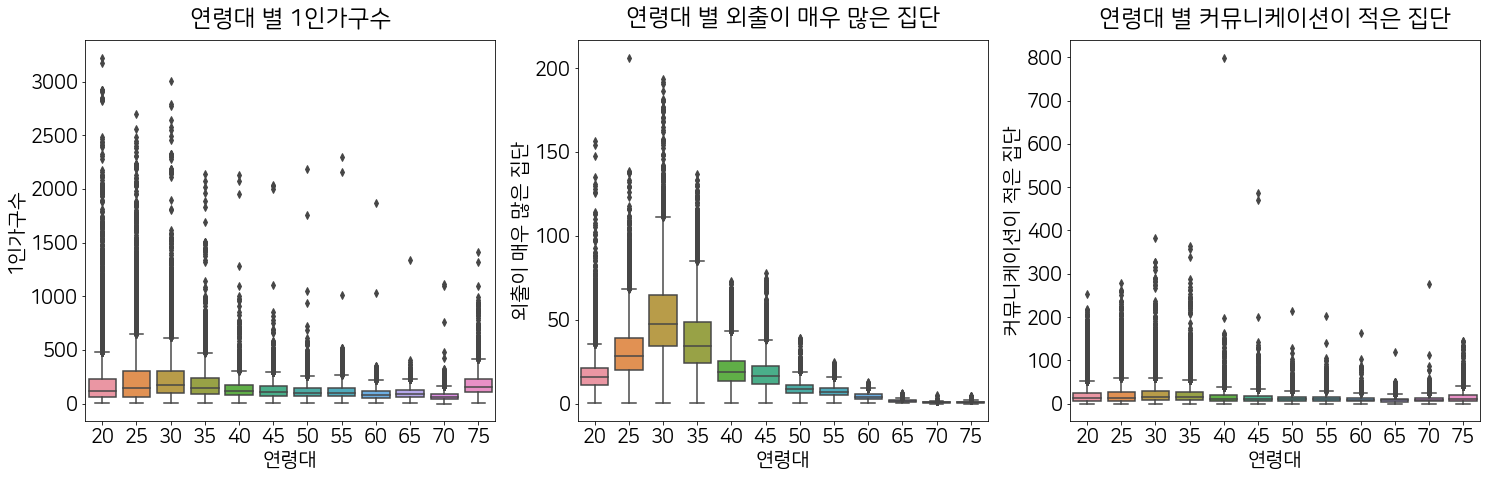

In [24]:
fig = plt.figure(figsize=(25, 7))
ax1, ax2, ax3 = fig.subplots(1, 3)

ax1.set_title("연령대 별 1인가구수", pad=15)
_=sns.boxplot(data=df, x='연령대', y="1인가구수", ax=ax1)

ax2.set_title("연령대 별 외출이 매우 많은 집단", pad=15)
_=sns.boxplot(data=df, x='연령대', y="외출이 매우 많은 집단", ax=ax2)

ax3.set_title("연령대 별 커뮤니케이션이 적은 집단", pad=15)
_=sns.boxplot(data=df, x='연령대', y="커뮤니케이션이 적은 집단", ax=ax3)

## 3.2 지역 별 

### 3.2.1 지역 별 1인 가구 수 
지역별 1인 가구수를 지도에 시각화 합니다. 1인 가구수가 많을 수록 원의 크기가 커지도록 표현합니다.

In [29]:
lat = df_info["위도"].mean()
long = df_info["경도"].mean()

m = folium.Map(location=[lat, long], zoom_start=12)

for region in df['자치구'].unique(): 
   info_region = df_info[df_info['시군구명_한글'] == region]
   sum_region = df[df['자치구'] == region]['1인가구수'].sum() 

   marker = folium.CircleMarker([info_region['위도'], info_region['경도']], 
                                  radius=sum_region/10000,                
                                  color='#3186cc',           
                                  fill_color='#3186cc',       
                                  popup=' '.join((region, str(sum_region))))
   
   marker.add_to(m)
   
   
folium_deepnote_show(m)

- 1인 가구수가 가장 많은 지역은 관악구(1556969.25), 적은 지역은 중구(341113.85)입니다. 
- 최종 시각화에서는 실제 지도 표현 방식보다 평면적으로, 원의 크기는 색깔로, 위치는 핀으로 표현합니다.
- 최종 시각화에서 데이터셋은 데이터의 양이 더 많은 df_year를 전처리 한 데이터셋으로 변경해서 진행합니다. 

----------------

# 4.데이터 전처리

## 4.1 서울 시민생활 데이터-행정동단위 10개 관심집단수 데이터

In [11]:
# 원본 데이터를 카피하여 사용합니다. 
df_main = df.copy() 
print("df_main shape: ", df_main.shape)
display(df_main.head())

df_main shape:  (111936, 17)


,행정동코드,자치구,행정동명,성별,연령대,총인구,1인가구수,커뮤니케이션이 적은 집단,평일 외출이 적은 집단,휴일 외출이 적은 집단,출근소요시간 및 근무시간이 많은 집단,외출이 매우 적은 집단(전체),외출이 매우 많은 집단,동영상서비스 이용이 많은 집단,생활서비스 이용이 많은 집단,재정상태에 대한 관심집단,외출-커뮤니케이션이 모두 적은 집단(전체)
0,1101053,종로구,사직동,1,20,221.00,51.97,8.335199,5.796584,7.415139,5.552525,4.166128,4.89,7.638924,1.961916,3.961066,2.067203
1,1101053,종로구,사직동,1,25,321.00,109.52,11.470799,11.454176,7.532451,11.114420,4.869294,12.95,10.347566,19.109366,16.766866,2.405569
2,1101053,종로구,사직동,1,30,351.11,107.71,15.288244,15.401204,9.599103,11.075590,9.442518,20.05,14.181075,10.767105,13.375326,6.666862
3,1101053,종로구,사직동,1,35,353.00,106.53,16.389481,10.787259,7.525317,10.245072,11.536156,15.33,16.540153,9.957706,7.537253,13.037654
4,1101053,종로구,사직동,1,40,419.00,80.24,13.778743,6.035512,11.261931,5.563842,7.523350,10.97,7.483620,5.407695,8.732050,11.160781


### 4.1.1 연령대 별 병합
`20대(초기청년층) - 20` /  `30대 (후기 청년층) - 30` / `40대 (중년층) - 40` / `50~64(장년층) - 50` / `65세 이상 (노년층) - 60` 으로 연령대를 병합합니다. 

In [12]:
def age_merge(x): 
  if 20 <= x < 30: 
    return 20 
  elif 20 <= x < 40: 
    return 30 
  elif 40 <= x < 50: 
    return 40
  elif 50 <= x < 65: 
    return 50 
  else: 
    return 60 

df_main["연령대"] = df_main['연령대'].apply(age_merge)

# 확인
df_main['연령대'].unique() 

array([20, 30, 40, 50, 60])

## 4.2 서울시 1인가구(연령별) 통계 데이터

In [13]:
# 원본 데이터를 카피하여 사용합니다. 
df_2016_2021 = df_year.copy() 
print("df_2016_2021 shape: ", df_2016_2021.shape)
display(df_2016_2021.head())

df_2016_2021 shape:  (29, 98)


,자치구별(1),자치구별(2),2016,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,...,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12,2021.13,2021.14,2021.15
0,자치구별(1),자치구별(2),합계,합계,합계,합계,합계,합계,합계,합계,...,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계
1,자치구별(1),자치구별(2),소계,20세미만,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
2,자치구별(1),자치구별(2),계,계,계,계,계,계,계,계,...,계,계,계,계,계,계,계,계,계,계
3,합계,소계,1138860.0,14937.0,101069.0,169534.0,152434.0,107045.0,88976.0,83763.0,...,99293.0,89640.0,89413.0,86500.0,102413.0,88494.0,69402.0,57061.0,42020.0,28407.0
4,합계,종로구,22835.0,526.0,2973.0,3547.0,2486.0,1723.0,1497.0,1633.0,...,1690.0,1620.0,1783.0,1757.0,1864.0,1546.0,1160.0,1133.0,811.0,597.0


### 4.2.1 연도 별 연령 별 1인 가구 수 기본 전처리 
제공되는 데이터의 형태가 정제되어있지 않아서 데이터 분석이 가능한 형태로 전처리합니다.

- 필요 없는 열, 행 삭제 (자치구별, 소계, 합계, 계 포함된 데이터) 

In [14]:
df_2016_2021 = df_2016_2021.drop(columns=["자치구별(1)"]).drop([0, 2, 3])

- 컬럼 년도 전처리   
1행의 연령대 별로 년도 뒤에 숫자가 붙어있는 것을 삭제합니다.

In [15]:
lst_year = list(range(2016, 2022))
lst_num = list(range(1, 16))

# 연도 합계 삭제 
for year in lst_year: 
  df_2016_2021 = df_2016_2021.drop(columns=[str(year)])

# 연도 이름 통일 
for year in lst_year: 
  for num in lst_num:
    df_2016_2021 = df_2016_2021.rename(columns={f"{year}.{num}" : f'{year}'})

df_2016_2021.head()

,자치구별(2),2016,2016,2016,2016,2016,2016,2016,2016,2016,...,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
1,자치구별(2),20세미만,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,...,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
4,종로구,526.0,2973.0,3547.0,2486.0,1723.0,1497.0,1633.0,1544.0,1537.0,...,1690.0,1620.0,1783.0,1757.0,1864.0,1546.0,1160.0,1133.0,811.0,597.0
5,중구,567.0,2061.0,2521.0,2140.0,1595.0,1461.0,1575.0,1391.0,1482.0,...,1607.0,1486.0,1609.0,1540.0,1728.0,1567.0,1168.0,962.0,762.0,555.0
6,용산구,250.0,2591.0,4108.0,4316.0,3191.0,2771.0,2604.0,2090.0,2102.0,...,3106.0,2624.0,2451.0,2166.0,2364.0,1925.0,1466.0,1335.0,1117.0,899.0
7,성동구,878.0,4276.0,5706.0,4400.0,3225.0,2824.0,2833.0,2561.0,2548.0,...,3011.0,2773.0,2822.0,2721.0,3078.0,2464.0,1854.0,1666.0,1252.0,773.0


- 연령대 컬럼 처리 및 연도 컬럼 생성 

In [16]:
# 연령대 컬럼을 만들기 위해 행 따로 추출 
df_2016_2021 = df_2016_2021.rename(columns={'자치구별(2)': "자치구"})
age = df_2016_2021.loc[1]
df_2016_2021 = df_2016_2021.drop(1)
print("== 필요 없는 column, row 삭제 후 ==")
display(df_2016_2021.head() )

# 연도 컬럼 녹이기
df_melt = df_2016_2021.melt(id_vars=['자치구']).rename(columns={"variable": '연도', "value": "1인가구수"}).sort_values(by=['자치구', '연도'])

# 연령대 컬럼 추가 
df_melt['연령대'] = age.iloc[1:].values.tolist()*25

print()
print("== 연도 녹이고 연령대 추가 ==")
display(df_melt.head())

== 필요 없는 column, row 삭제 후 ==


,자치구,2016,2016,2016,2016,2016,2016,2016,2016,2016,...,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
4,종로구,526.0,2973.0,3547.0,2486.0,1723.0,1497.0,1633.0,1544.0,1537.0,...,1690.0,1620.0,1783.0,1757.0,1864.0,1546.0,1160.0,1133.0,811.0,597.0
5,중구,567.0,2061.0,2521.0,2140.0,1595.0,1461.0,1575.0,1391.0,1482.0,...,1607.0,1486.0,1609.0,1540.0,1728.0,1567.0,1168.0,962.0,762.0,555.0
6,용산구,250.0,2591.0,4108.0,4316.0,3191.0,2771.0,2604.0,2090.0,2102.0,...,3106.0,2624.0,2451.0,2166.0,2364.0,1925.0,1466.0,1335.0,1117.0,899.0
7,성동구,878.0,4276.0,5706.0,4400.0,3225.0,2824.0,2833.0,2561.0,2548.0,...,3011.0,2773.0,2822.0,2721.0,3078.0,2464.0,1854.0,1666.0,1252.0,773.0
8,광진구,805.0,6136.0,9929.0,8069.0,5156.0,3903.0,3680.0,3278.0,3292.0,...,4257.0,3554.0,3738.0,3608.0,3969.0,3023.0,2184.0,1764.0,1216.0,806.0



== 연도 녹이고 연령대 추가 ==


,자치구,연도,1인가구수,연령대
22,강남구,2016,572.0,20세미만
47,강남구,2016,3290.0,20~24세
72,강남구,2016,9652.0,25~29세
97,강남구,2016,11904.0,30~34세
122,강남구,2016,8747.0,35~39세


- **df_melt:** 자치구, 연도, 1인가구수, 연령대 컬럼 존재 - 지역별, 연도별, 연령대별 분석을 위한 데이터셋 

In [17]:
df_melt = df_melt.reset_index(drop=True)
display("df_melt shape: ", df_melt.head())
print(df_melt.shape)

'df_melt shape: '

,자치구,연도,1인가구수,연령대
0,강남구,2016,572.0,20세미만
1,강남구,2016,3290.0,20~24세
2,강남구,2016,9652.0,25~29세
3,강남구,2016,11904.0,30~34세
4,강남구,2016,8747.0,35~39세


(2250, 4)


- **df_total:** 연도 지역 별 별 연령대 별 데이터셋  

In [18]:
df_total = df_melt.pivot_table(index=['연도', '자치구'], columns='연령대')
print("df_total shape: ", df_total.shape)
display(df_total.head())

df_total shape:  (150, 15)


1인가구수                                                             \
연령대        20~24세   20세미만   25~29세   30~34세   35~39세  40~44세  45~49세  50~54세   
연도   자치구                                                                       
2016 강남구   3290.0   572.0   9652.0  11904.0   8747.0  5937.0  4585.0  3313.0   
     강동구   1453.0   158.0   4187.0   4865.0   3929.0  3415.0  3456.0  3442.0   
     강북구   1814.0   199.0   3119.0   3258.0   2892.0  2804.0  3089.0  3211.0   
     강서구   2839.0   279.0   8418.0   8827.0   6333.0  5100.0  4440.0  4049.0   
     관악구  12313.0  1053.0  25782.0  18425.0  10026.0  7119.0  5673.0  4635.0   

                                                                  
연령대       55~59세  60~64세  65~69세  70~74세  75~79세  80~84세   85세이상  
연도   자치구                                                          
2016 강남구  3181.0  2911.0  2484.0  2016.0  1518.0  1011.0   877.0  
     강동구  3679.0  3305.0  2532.0  1887.0  1477.0  1010.0   674.0  
     강북구  3548.0  3232.0  2887.0  2618.0  2079.0  1251.0   667.0  
     강서구  4872.0  4362.0  3534.0  2877.0  2368.0  1589.0  1101.0  
     관악구  4627.0  3986.0  3294.0  2836.0  2261.0  1205.0   737.0

### 4.2.2 연령대 별 병합
`20세미만(미성년자) - 10` / `20대(초기청년층) - 20` /  `30대 (후기 청년층) - 30` / `40대 (중년층) - 40` / `50~64(장년층) - 50` / `65세 이상 (노년층) - 60` 으로 나누어 연령대를 병합합니다. 

In [19]:
# 20세 미만은 10대로 구분 
df_melt["연령대"] = df_melt["연령대"].str.replace("20세미만", "10")

# 연령대 분리 
df_melt['연령대'] = df_melt['연령대'].str.replace('세|이상', "").str.split("~")

def age_merge2(lst_age): 
  x = int(lst_age[0])
  if x <= 10:
    return 10 
  elif 20 <= x < 30: 
    return 20 
  elif 20 <= x < 40: 
    return 30 
  elif 40 <= x < 50: 
    return 40
  elif 50 <= x < 65: 
    return 50 
  else: 
    return 60 

df_melt["연령대"] = df_melt['연령대'].apply(age_merge2)

# 확인
df_melt['연령대'].unique() 

<ipython-input-19-ef518943cc09>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_melt['연령대'] = df_melt['연령대'].str.replace('세|이상', "").str.split("~")


array([10, 20, 30, 40, 50, 60])

---------

# 5.데이터 분석 / 시각화
위에서 얻은 인사이트를 토대로 주제에 맞는 데이터 시각화를 진행합니다.

<br>

----------

<br>

#### ▪️ 전처리 데이터셋 

  1. 서울 시민생활 데이터-행정동단위 10개 관심집단수 데이터
  - df_main  


  2. 서울시 1인가구(연령별) 통계 데이터
  - df_melt / df_total

<br>

---------

<br>

#### ▪️ 가설 설정
1. 1인 가구가 지속적으로 증가했을 것이다. 
2. 연령대가 높아질 수록 사회적 접촉이 감소할 것이다. 

<br>

---------

<br>

#### ▪️ 시각화 목록 
1. 지역 별 1인 가구 수 (현재 지역 별 1인 가구 수 현황 파악) 
2. 연도 별 1인 가구 추이 
3. 연령대 별 사회적 접촉 (연령대 별 외출이 많은 집단 + 연령대 별 커뮤니케이션 지수) 




### 5.1 지역 별 1인 가구 수
단계구분도 시각화를 통해 현재 지역 별 1인 가구수의 형황을 파악합니다. 

- **folium choropleth (단계구분도)**

In [30]:
df_group = df_melt.groupby("자치구")['1인가구수'].sum()

r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

lat = df_info["위도"].mean()
long = df_info["경도"].mean()

m = folium.Map(location=[lat, long], 
               zoom_start=12,
               tiles='cartodbpositron')


folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

# 단계구분도 
m.choropleth(geo_data=seoul_geo,
             data=df_group, 
             fill_color='Reds', 
             fill_opacity=0.7,
             line_opacity=0.3,
             key_on='properties.name',
             legend_name="지역구별 1인가구수",
             title='제목목'
            )


# 마커 추가 
for region in df['자치구'].unique(): 
   info_region = df_info[df_info['시군구명_한글'] == region]
   sum_region = df_melt[df_melt['자치구'] == region]['1인가구수'].sum() 

   marker = folium.Marker (location=[info_region['위도'], info_region['경도']],                     
                                  icon=folium.Icon(color='blue',icon='star'),      
                                  tooltip=' '.join((region, str(int(sum_region)))))
   
   marker.add_to(m)


   
folium_deepnote_show(m)

관악구와 강서구는 다른 지역에 비해 색깔이 짙고, 용산구, 종로구, 중구, 양천구는 색이 옅게 나타납니다.

### 5.2 연도 별 1인 가구 추이

- **barplot + lineplot**

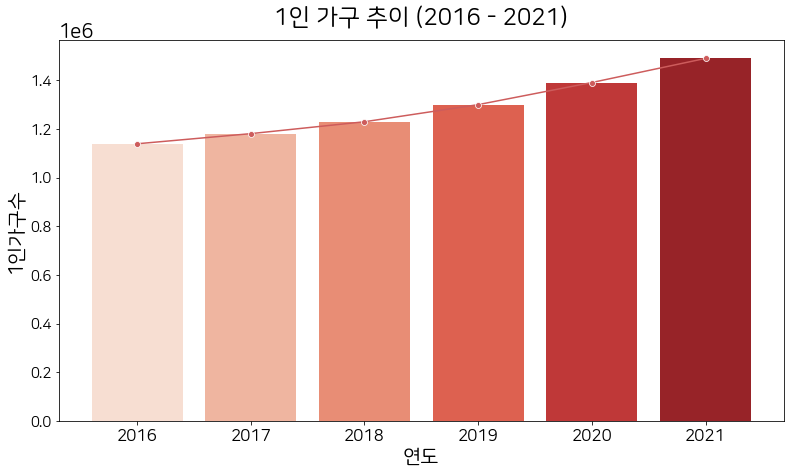

In [21]:
plt.figure(figsize=(13, 7))
plt.rc('font', size=20)

plt.title("1인 가구 추이 (2016 - 2021)", pad=15)

sns.barplot(data = df_melt, x="연도", y="1인가구수", estimator=sum, ci=None, palette=sns.color_palette("Reds"))
sns.lineplot(data = df_melt, x="연도", y="1인가구수", estimator=sum, ci=None, color='#CD5C5C', marker='o')

_ = plt.yticks(fontsize=15)
_ = plt.xticks(fontsize=17)

연도 별로 1인 가구 수의 총 합을 시각화 해보았을 때, 점점 1인가구 수가 증가하는 것을 확인할 수 있습니다. 

### 5.3 연령대 별 사회적 접촉


- **bar graph**

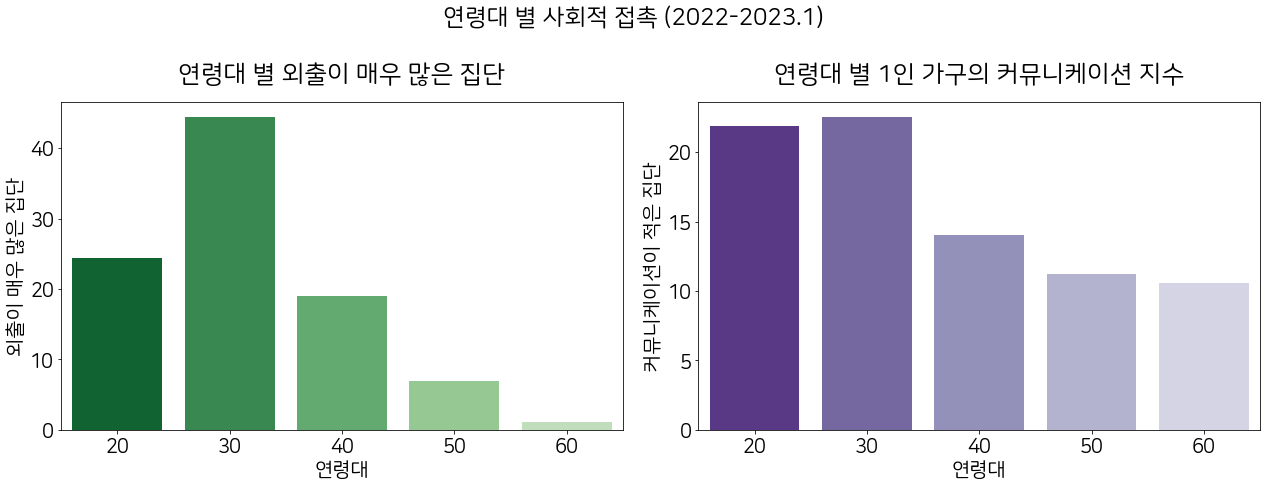

In [22]:
fig = plt.figure(figsize=(18, 7))
ax1, ax2 = fig.subplots(1, 2)

plt.suptitle("연령대 별 사회적 접촉 (2022-2023.1)")

ax1.set_title("연령대 별 외출이 매우 많은 집단", pad=20, fontsize=25)
_=sns.barplot(data=df_main, x='연령대', y='외출이 매우 많은 집단', palette=sns.color_palette("Greens_r"), ci=None, ax=ax1)

ax2.set_title("연령대 별 1인 가구의 커뮤니케이션 지수", pad=20, fontsize=25)
_=sns.barplot(data=df_main, x='연령대', y='커뮤니케이션이 적은 집단', palette=sns.color_palette("Purples_r"), ci=None, ax=ax2)

fig.tight_layout()

- **pie chart** 

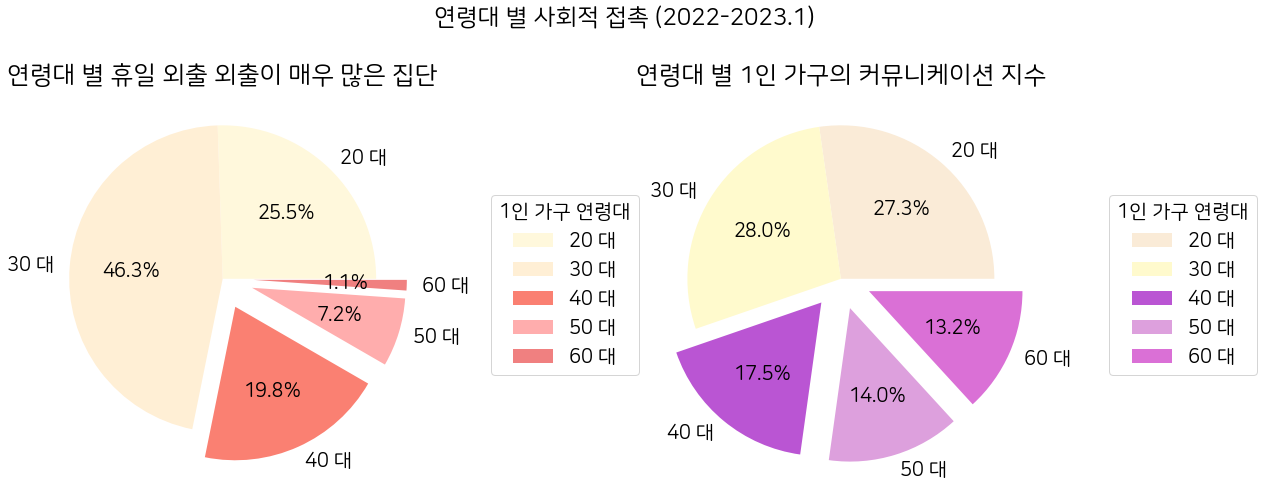

In [23]:
fig = plt.figure(figsize=(18, 7))
ax1, ax2 = fig.subplots(1, 2)

plt.suptitle("연령대 별 사회적 접촉 (2022-2023.1)")

df_age_out = df_main.groupby("연령대")['외출이 매우 많은 집단'].mean()
df_age_com = df_main.groupby("연령대")['커뮤니케이션이 적은 집단'].mean()

ax1.set_title("연령대 별 휴일 외출 외출이 매우 많은 집단", pad=5, fontsize=25)
_ = ax1.pie(
    df_age_out, 
    labels=[str(age)+" 대" for age in df_age_out.index], 
    autopct = '%.1f%%', 
    explode = [0, 0, 0.2, 0.2, 0.2],
    colors=['#FFF8DC','#FFEFD5','#FA8072', '#ffadad', '#F08080']) 

_ = ax1.legend(loc = (1.2, 0.25), title = '1인 가구 연령대')


ax2.set_title("연령대 별 1인 가구의 커뮤니케이션 지수", pad=5, fontsize=25)
_ = ax2.pie(
    df_age_com, 
    labels=[str(age)+" 대" for age in df_age_com.index], 
    autopct = '%.1f%%', 
    explode = [0, 0, 0.2, 0.2, 0.2],
    colors=['#FAEBD7','#FFFACD','#BA55D3', '#DDA0DD', '#DA70D6']) 

_ = ax2.legend(loc = (1.2, 0.25), title = '1인 가구 연령대')


fig.tight_layout()

연령대 별로 사회적 접촉량이 많은지 알아보기 위해 **외출이 매우 많은 집단**과 **커뮤니케이션 지수** 를 시각화 해보았을 때 두 가지 경우 모두 40대 이후로 감소하는 것을 확인할 수 있습니다.

------

# 6.데이터 분석 요약

### 1️⃣ 1인 가구 수 추이   
- **2016년~2022년 1인 가구수 총합**을 구하여 시간의 경과에 따른 변화량과 데이터지도를 그려봤을때, **연도별 1인 가구수는 지속적으로 증가**하고 있습니다.

<br>

### 2️⃣ 연령대 별 사회적 접촉  
- 2022년 이후 연령대별로 1인 가구의 **커뮤니케이션이 적은 집단을 비교해봤을 때, 중년층 이후 커뮤니케이션 지수가 감소**하는 경향을 보입니다.
  - `커뮤니케이션이 적은 집단 측정 기준:` 전화/문자 수 발신 대상자 수, 전화/문자 수 발신 건 수,
SNS 사용량 기준

- 2022년 이후 연령대 별 1인 가구의 **외출이 매우 많은 집단 데이터를 비교해봤을 때, 중년층 이후 외출이 감소**하는 경향을 보입니다. 
  - `외출이 매우 많은집단 측정 기준:` 1인가구 대상 근로소득이 3천만원 초과이고, 
휴일의 이동건수와 이동거리가 크고, 
휴일의 추정거주지 체류시간이 적은 사람 기준
(휴일 이동경향이 높은 대상자를 구분하기 위함)
